## Imagine you are the boss of a casino.

You are the boss. You have two machines, you have to design a multi-armed bandit.


In [4]:
# use python library
import numpy as np
import time

# one: win money
arm0 = 0.2
# another one: lose money
arm1 = -0.2

# return random rewards
# draw random samples from a normal (Gaussian) distribution
def bandit_machine(selected_arm):
  arms_true_value = [0.2, -0.2] # arm 0 and arm 1
  arms_std_devs = [2., 2.]
  return np.random.normal(arms_true_value[selected_arm], arms_std_devs[selected_arm])



Testing:

two players: Tim and Tony

In [5]:
tim_select_arm = 0

reward = bandit_machine(tim_select_arm)

print("Tim", reward)

tony_select_arm = 1

reward = bandit_machine(tony_select_arm)

print("Tony", reward)

tim_select_arm = 1

reward = bandit_machine(tim_select_arm)

print("Tim", reward)

tony_select_arm = 0

reward = bandit_machine(tony_select_arm)

print("Tony", reward)

Tim 0.27984824947879094
Tony 2.808070518622338
Tim -0.5821094003180443
Tony 0.7782298865613837


## Now imagine that you are a player

You will play 2 machines. What is your strategy?


### Strategy 1: random

In [10]:
import numpy as np

# strategy - random
def select_arm_by_random(total_arms):
  return np.random.randint(total_arms)

# the total number of arms
total_arms = 2

print("Testing")
# now you play 20 times
total_t = 20
for i in range(total_t):
  selected_arm = select_arm_by_random(2)
  print(selected_arm)



Testing
1
1
1
0
0
0
1
0
1
1
0
0
1
1
1
0
0
1
0
0


In [12]:
# You are a player: rewards_collected[0] for arm0, rewards_collected[1] for arm1
rewards_collected = [[],[]]

print("Game is starting ...")
# you play 10 times
total_t = 10
for i in range(total_t):
  # use a random strategy
  arm = select_arm_by_random(2)

  r = bandit_machine(arm) # machine returns reward

  print("Play_time_step",i+1, ": select arm", arm, ", receive_reward", r, )
  # the true arm_value is unknown to players. The boss knows: one arm with winning money arm0 = 0.2  another one with losing money arm1 = -0.2

  rewards_collected[arm].append(r)
  time.sleep(2)

# sum of rewards for arm0, sum of rewards for arm1
print("arm 0:", np.sum(rewards_collected[0]),"arm 1:", np.sum(rewards_collected[1]))
print("Total rewards:", np.sum(rewards_collected[0]) + np.sum(rewards_collected[1]))

Game is starting ...
Play_time_step 1 : select arm 0 , receive_reward -2.536070839647887
Play_time_step 2 : select arm 0 , receive_reward 0.8998836115028686
Play_time_step 3 : select arm 1 , receive_reward -0.6944189958573245
Play_time_step 4 : select arm 0 , receive_reward 0.8432184932299116
Play_time_step 5 : select arm 1 , receive_reward -1.1423417427168234
Play_time_step 6 : select arm 0 , receive_reward -1.7921276212545358
Play_time_step 7 : select arm 1 , receive_reward 7.150614923848451
Play_time_step 8 : select arm 0 , receive_reward -0.8605842915538455
Play_time_step 9 : select arm 1 , receive_reward -0.2284833123689804
Play_time_step 10 : select arm 1 , receive_reward -0.5903494078839939
arm 0: -3.4456806477234876 arm 1: 4.495021465021329
Total rewards: 1.0493408172978418


### Strategy 2: greedy

In [13]:
# greedy: alway choose the current best, i.e. using argmax
def select_arm_by_greedy(estimated_values):
  return np.argmax(estimated_values)

In [18]:
# You are a player: record estimated values for each arm
num_arms = 2
estimated_values = np.zeros(num_arms)
print("Initial estimate:", estimated_values[0], estimated_values[1])

# record numbers of pulls or plays for each arm
num_pulls = np.zeros(num_arms)
print("Initial number of pulls:",  num_pulls[0], num_pulls[1])

rewards_collected = [[0], [0]]
timestep_collected = [[0], [0]]

print("Game is starting ...")
# play total_t rounds
total_t = 10
for i in range(total_t):
  # use greedy strategy
  arm = select_arm_by_greedy(estimated_values)

  reward = bandit_machine(arm) # machine from casino

  num_pulls[arm] += 1

  pre_estimated_value = estimated_values[arm]

  diff = reward - pre_estimated_value

  estimated_values[arm] = estimated_values[arm] + diff / num_pulls[arm]

  print("Play_time_step",i+1, ": choose arm", arm, ", receive_reward", reward)
  # the true arm_value is unknown to players. The boss knows: one arm with winning money arm0 = 0.2  another one with losing money arm1 = -0.2

  print(" --Previous estimated value", pre_estimated_value, "received_reward", reward, "difference between the recieved reward and the previous (old) estimated_values", diff, "-> Updated estimated_values", estimated_values[arm])
  rewards_collected[arm].append(reward)
  timestep_collected[arm].append(i+1)
  time.sleep(2)

print("arm 0", rewards_collected[0], np.sum(rewards_collected[0]))
print("arm 1", rewards_collected[1], np.sum(rewards_collected[1]))
print("Total", np.sum(rewards_collected[0]) + np.sum(rewards_collected[1]))


Initial estimate: 0.0 0.0
Initial number of pulls: 0.0 0.0
Game is starting ...
Play_time_step 1 : choose arm 0 , receive_reward -2.371638094397752
 --Previous estimated value 0.0 received_reward -2.371638094397752 difference between the recieved reward and the previous (old) estimated_values -2.371638094397752 -> Updated estimated_values -2.371638094397752
Play_time_step 2 : choose arm 1 , receive_reward 0.9092478578952596
 --Previous estimated value 0.0 received_reward 0.9092478578952596 difference between the recieved reward and the previous (old) estimated_values 0.9092478578952596 -> Updated estimated_values 0.9092478578952596
Play_time_step 3 : choose arm 1 , receive_reward -1.8606864023356184
 --Previous estimated value 0.9092478578952596 received_reward -1.8606864023356184 difference between the recieved reward and the previous (old) estimated_values -2.769934260230878 -> Updated estimated_values -0.4757192722201793
Play_time_step 4 : choose arm 1 , receive_reward -0.4708287593

Plot figures

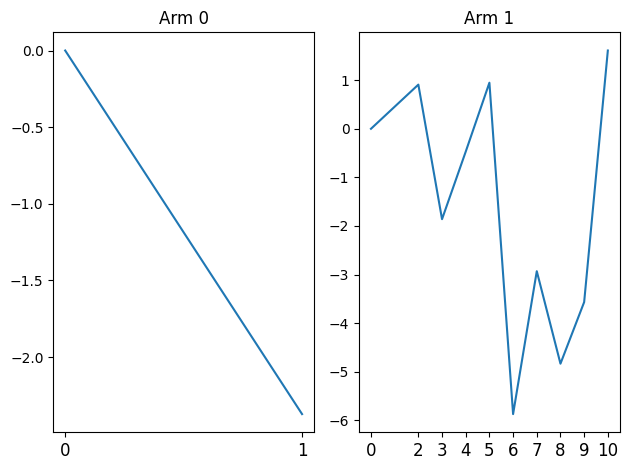

In [19]:
import matplotlib.pyplot as plt

ys = rewards_collected[0]
x = timestep_collected[0]

fig = plt.figure()
ax1 = plt.subplot2grid((1, 2), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), rowspan=1, colspan=1)

ax1.plot(x, ys, '-')
ax1.set_xticks(x)
ax1.set_xticklabels(x, fontsize=12)

ax1.set_title("Arm 0")

ys = rewards_collected[1]
x = timestep_collected[1]
ax2.plot(x, ys, '-')
ax2.set_xticks(x)
ax2.set_xticklabels(x, fontsize=12)

ax2.set_title("Arm 1")
plt.tight_layout()
plt.show()

In [22]:
# e-greedy:
# choose the current best, i.e. using argmax with probability 1-epsilon
# choose a random arm with probability epsilon
def select_arm_by_egreedy(estimated_values, epsilon = 0.2):
  if np.random.random() > epsilon:
    return np.argmax(estimated_values) # exploitation
  else:
    return np.random.randint(num_arms) # exploration

In [26]:
# You are a player: record estimated values for each arm
num_arms = 2
estimated_values = np.zeros(num_arms)
print("Initial estimate:", estimated_values[0], estimated_values[1])

# record numbers of pulls or plays for each arm
num_pulls = np.zeros(num_arms)
print("Initial number of pulls:",  num_pulls[0], num_pulls[1])

rewards_collected = [[0], [0]]
timestep_collected = [[0], [0]]

print("Game is starting ...")
# play total_t rounds
total_t = 10
for i in range(total_t):
  # use greedy strategy
  arm = select_arm_by_egreedy(estimated_values)

  reward = bandit_machine(arm) # machine from casino

  num_pulls[arm] += 1

  pre_estimated_value = estimated_values[arm]

  diff = reward - pre_estimated_value

  estimated_values[arm] = estimated_values[arm] + diff / num_pulls[arm]

  print("Play_time_step",i+1, ": choose arm", arm, ", receive_reward", reward)
  # the true arm_value is unknown to players. The boss knows: one arm with winning money arm0 = 0.2  another one with losing money arm1 = -0.2

  print(" --Previous estimated value", pre_estimated_value, "received_reward", reward, "difference between the recieved reward and the previous (old) estimated_values", diff, "-> Updated estimated_values", estimated_values[arm])
  rewards_collected[arm].append(reward)
  timestep_collected[arm].append(i+1)
  time.sleep(2)

print("arm 0", rewards_collected[0], np.sum(rewards_collected[0]))
print("arm 1", rewards_collected[1], np.sum(rewards_collected[1]))
print("Total", np.sum(rewards_collected[0]) + np.sum(rewards_collected[1]))


Initial estimate: 0.0 0.0
Initial number of pulls: 0.0 0.0
Game is starting ...
Play_time_step 1 : choose arm 0 , receive_reward 0.17332716330303746
 --Previous estimated value 0.0 received_reward 0.17332716330303746 difference between the recieved reward and the previous (old) estimated_values 0.17332716330303746 -> Updated estimated_values 0.17332716330303746
Play_time_step 2 : choose arm 1 , receive_reward 1.1223999222208232
 --Previous estimated value 0.0 received_reward 1.1223999222208232 difference between the recieved reward and the previous (old) estimated_values 1.1223999222208232 -> Updated estimated_values 1.1223999222208232
Play_time_step 3 : choose arm 1 , receive_reward -1.5120520510352797
 --Previous estimated value 1.1223999222208232 received_reward -1.5120520510352797 difference between the recieved reward and the previous (old) estimated_values -2.6344519732561027 -> Updated estimated_values -0.19482606440722816
Play_time_step 4 : choose arm 0 , receive_reward -1.8560

plot figures

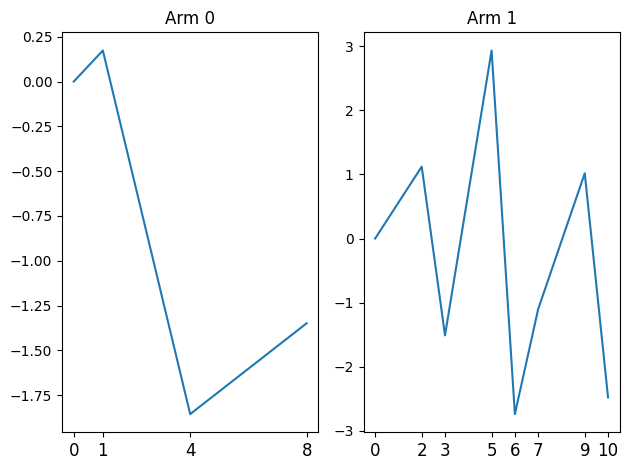

In [27]:
import matplotlib.pyplot as plt

ys = rewards_collected[0]
x = timestep_collected[0]

fig = plt.figure()
ax1 = plt.subplot2grid((1, 2), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), rowspan=1, colspan=1)

ax1.plot(x, ys, '-')
ax1.set_xticks(x)
ax1.set_xticklabels(x, fontsize=12)

ax1.set_title("Arm 0")

ys = rewards_collected[1]
x = timestep_collected[1]
ax2.plot(x, ys, '-')
ax2.set_xticks(x)
ax2.set_xticklabels(x, fontsize=12)

ax2.set_title("Arm 1")
plt.tight_layout()
plt.show()